# Scikit-image: Introduction to Image Processing
*Scikit-image* is a Python package designed to perform image processing. It uses
NumPy arrays as image objects.

the basic image processing topic covered in this lab are as follow:
- RGB Color model
- Image Manipulation
- Image transformation and filtering

## RGB Color model
Basically, a digital image is composed of a finite number of elements. Each
element have a value at a particular location which is commonly called **pixel**.
The pixel value depends on types of image as follows:

- **Binary Image**: (monochrome) is the image that contain only two pixel value that are 0 (black)
and 1(white).
- **8-bit color Image**: is a famous image format which contains 256 different
shades of colors. In this format, 0 refers to Black, 255 refers to White,
and 127 refers to Gray. Normally, pictures taken from digital camera and
be saved as JPEG format are store in a standard of ”8-bit” image.
- **16 bit color Image**: is a high color format contain 65,536 different colors
in it. The distribution of this color is different from 8-bit image

In [3]:
import matplotlib.pyplot as plt
from skimage import io

In [8]:
img = io.imread('baboon.png')    # a matrix storing a bunch of pixels

In [11]:
print(img[0])        # get every pixel in row_index=0
print(img[0, 0])     # get a pixel in row_index=0 and column_index=0
print(img[0, 0, 0])  # get a pixel in row_index=0, column_index=0, and R (index=0)

[[133 112  53]
 [ 57  53  30]
 [ 48  32  24]
 ...
 [116 105  62]
 [137 150  82]
 [170 182 101]]
[133 112  53]
133


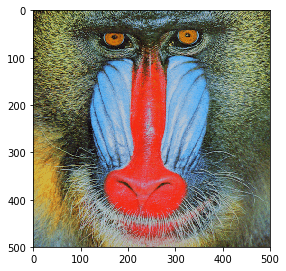

In [39]:
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('on')

plt.tight_layout()
plt.show()

In [12]:
print(img.dtype)   # 8 pixel
print(img.shape)   # number of rows, columns, and channels (colour image, grayscale have only row+column)
print(img.size)
print(type(img))

uint8
(500, 500, 3)
750000
<class 'numpy.ndarray'>


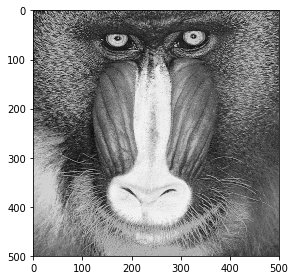

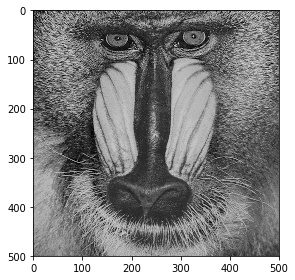

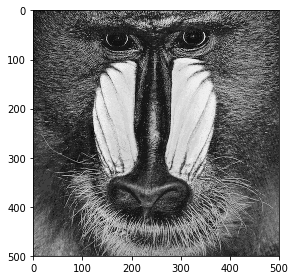

In [53]:
# R = 0, G = 1, B = 2
# dark -> less colour | lighter -> more colour
io.imshow(img[:,:,0])
io.show()
io.imshow(img[:,:,1])
io.show()
io.imshow(img[:,:,2])
io.show()

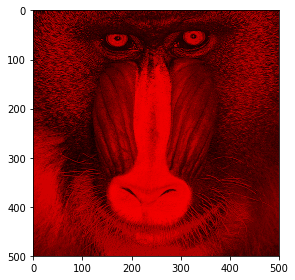

In [14]:
red_image = img.copy()
red_image[:,:,1] = 0    # change G to black
red_image[:,:,2] = 0    # change B to black
io.imshow(red_image)
io.show()

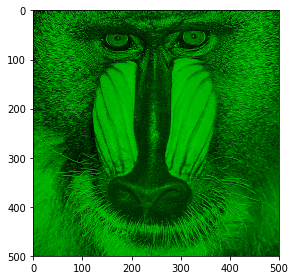

In [15]:
green_image = img.copy()
green_image[:,:,0] = 0     # change R to black
green_image[:,:,2] = 0     # change B to black
io.imshow(green_image)
io.show()

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


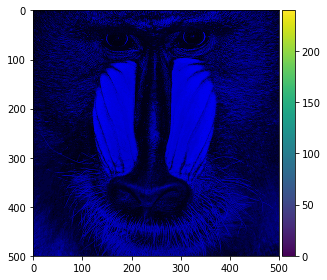

In [18]:
blue_image = img.copy()
blue_image[:,:,0] = 0    # change R to black
blue_image[:,:,1] = 0    # change G to black
io.imshow(blue_image)
io.show()

### Image Manipulation
As we mentioned earlier, the RGB image format can be represented in 2D-array
with 3 plane. For basic image manipulation, such as image cropping, simple
operations, such as NumPy and SciPy, can be used to manipulate the image.

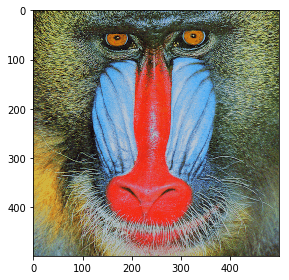

In [19]:
io.imshow(img[1:500,1:500])    # cropping image by choosing rows and columns
io.show()

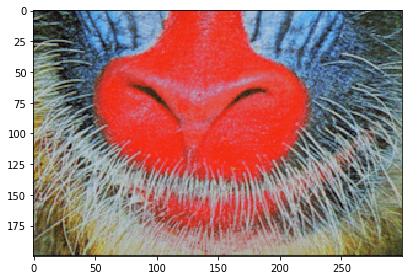

In [21]:
io.imshow(img[300:500,100:400])      # The lesser the number of rows and columns, the more we crop
io.show()

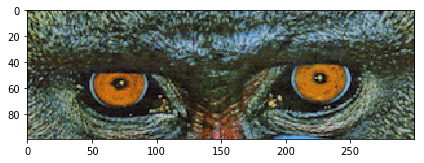

In [22]:
io.imshow(img[0:100, 100:400])
io.show()

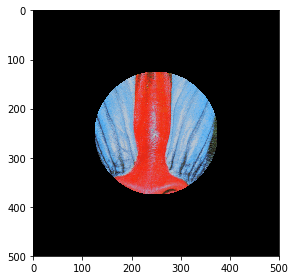

In [29]:
import numpy as np
# masking an image
test_image = img.copy()
lx, ly, lz = test_image.shape
X, Y = np.ogrid[0:lx, 0:ly]
# below is just simple circle equation (the lesser the denominator, the bigger the circle is)
mask = (X - lx / 2) ** 2 + (Y - ly /2 ) ** 2 > lx * ly / 16   # if you change 16 to 4, the circle will be bigger
test_image[mask] = 0
io.imshow(test_image)
io.show()

if the number of pixel color is go beyond 255, it will create pixel overflow. The wrap around will happen.

For example, the number of pixel colour is 200, you multiply it by 3, you'll get 600. But 600 exceeds 255. Wrap around means
you minus 600 with 256 until it doesn't exceed 255 -> 600 - 256(2) = 88. That means 200 changes to 88, which will also change the colour.

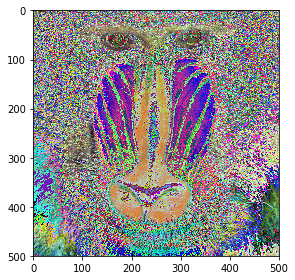

In [30]:
camera_multiply = img*3
io.imshow(camera_multiply)
io.show()

### Image transformation and filtering
Image transformation is a function that takes image as an input then produces
an image as an output through some specific operation. Next, we are
trying some of the very basic transformation functions provided by Scikit-image.

In [32]:
from skimage.transform import resize, rotate, swirl

C:\Users\User\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


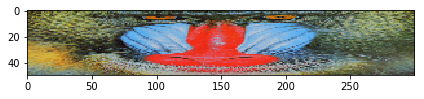

In [49]:
from skimage.transform import resize
resized = resize(img, (50, 300), mode='constant')   # img(row, column) -> increase/decrease size
io.imshow(resized)

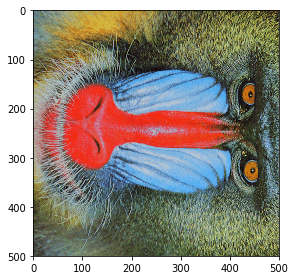

In [35]:
# rotate image by a certain angle around its center
# rotation angle in degrees in counter-clockwise direction

rotate = rotate(img, -90)
io.imshow(rotate)

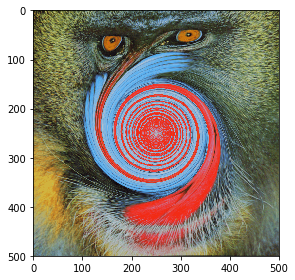

In [50]:
swirled = swirl(img, rotation=0, strength=100, radius=200, mode='constant')
io.imshow(swirled)
# io.show()

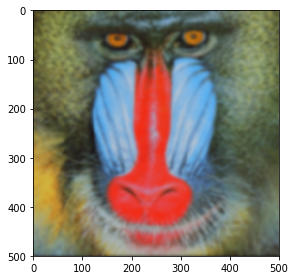

In [37]:
from skimage import filters

blurred_img = filters.gaussian(img, sigma=3, multichannel=True)
io.imshow(blurred_img)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


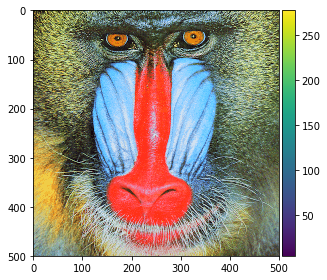

In [52]:
alpha = 0.15
shapened_img = img + alpha * (img - blurred_img)  # sharpening image
io.imshow(shapened_img.astype(int))